# Analyse  Source Table Visit

 work with Weakly_2024_07
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2024/03/05
- update : 2024/03/05


## Goal


Understand the difference between

- ``sourceTable_visit`` used in Light curves : https://github.com/sylvielsstfr/AuxTelComm/blob/main/notebooks_usdf/Photometry2024/LightCurves/lightCurves-Selected_visitfall_2023.ipynb
- ``ccdvisitTable``: https://github.com/sylvielsstfr/AuxTelComm/blob/main/notebooks_usdf/Photometry2024/visitCCD/ExtractPhotometricvisitTablesLoopOnNightObs-3864.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm,SymLogNorm


import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

## Config

In [2]:


file_selected_visits = "../data/202402/SelectedVisits_fall2023_tract_3864.csv"
filesource_in ="../data/202402/sourceTable_visit_202402_20231121-20231222.csv"
#filesource_in ="../data/202402/sourceTable_visit_202402.csv

## Read

### read visits

In [3]:
df_visit = pd.read_csv(file_selected_visits,index_col=0)

In [4]:
df_visit.head()

,nightObs,physical_filter,band,zeroPoint,expMidptMJD,obsStart,obsStartMJD,Time,airmass,patchID,tractID
visitId,,,,,,,,,,,
2023112100506,20231121,SDSSg_65mm~empty,g,28.037330,60270.293207,2023-11-22 07:01:58.064996,60270.293033,2023-11-22 07:01:58.064996,1.087878,3864,237
2023112100507,20231121,SDSSr_65mm~empty,r,27.826233,60270.293745,2023-11-22 07:02:44.576007,60270.293571,2023-11-22 07:02:44.576007,1.086620,3864,237
2023112100508,20231121,SDSSz_65mm~empty,z,27.281532,60270.294284,2023-11-22 07:03:31.156006,60270.294111,2023-11-22 07:03:31.156006,1.085371,3864,237
2023112100509,20231121,empty~SDSSy_65mm,y,26.175438,60270.294842,2023-11-22 07:04:19.313506,60270.294668,2023-11-22 07:04:19.313506,1.084094,3864,237
2023112100510,20231121,SDSSg_65mm~empty,g,28.049168,60270.295844,2023-11-22 07:05:45.944508,60270.295671,2023-11-22 07:05:45.944508,1.081935,3864,236


### Read sourceTable_visit

In [5]:
df = pd.read_csv(filesource_in,index_col=0)

In [6]:
df.head()

,coord_ra,coord_dec,ccdVisitId,parentSourceId,x,y,xErr,yErr,ra,dec,...,hsmShapeRegauss_flag_no_pixels,hsmShapeRegauss_flag_not_contained,hsmShapeRegauss_flag_parent_source,sky_source,detect_isPrimary,visit,detector,band,physical_filter,visitId
sourceId,,,,,,,,,,,,,,,,,,,,,
178455346761695233,12.257919,-72.901385,42547070208,0,147.697149,63.650357,0.039217,0.042320,12.257919,-72.901385,...,False,False,False,False,True,2023112100197,0,y,empty~SDSSy_65mm,2023112100197
178455346761695234,12.273812,-72.901984,42547070208,0,323.252923,39.418868,0.127257,0.199421,12.273812,-72.901984,...,False,False,False,False,True,2023112100197,0,y,empty~SDSSy_65mm,2023112100197
178455346761695235,12.344769,-72.902014,42547070208,0,1108.000000,30.000000,NaN,NaN,12.344769,-72.902014,...,False,False,False,False,True,2023112100197,0,y,empty~SDSSy_65mm,2023112100197
178455346761695236,12.466462,-72.901712,42547070208,0,2454.000000,25.000000,NaN,NaN,12.466462,-72.901712,...,False,False,False,False,True,2023112100197,0,y,empty~SDSSy_65mm,2023112100197
178455346761695237,12.497823,-72.901402,42547070208,0,2801.000000,32.000000,NaN,NaN,12.497823,-72.901402,...,False,False,False,False,True,2023112100197,0,y,empty~SDSSy_65mm,2023112100197


In [7]:
df.dropna(axis=1, how='all',inplace =True)

In [8]:
df["nightObs"] =df.apply(lambda x: x['visitId']//100_000, axis=1)

In [9]:
df_sel = df[['parentSourceId','ccdVisitId','x','y','ra','dec','coord_ra','coord_dec','calibFlux','psfFlux','gaussianFlux','localPhotoCalib','visit','band','extendedness_flag','detect_isPrimary']]

In [10]:
def convert_fluxtomag(x) :
    """
    The object and source catalogs store only fluxes. There are hundreds of flux-related columns, 
    and to store them also as magnitudes would be redundant, and a waste of space.
    All flux units are nanojanskys. The AB Magnitudes Wikipedia page provides a concise resource 
    for users unfamiliar with AB magnitudes and jansky fluxes. To convert to AB magnitudes use:
    As demonstrated in Section 2.3.2, to add columns of magnitudes after retrieving columns of flux, users can do this:
    results_table['r_calibMag'] = -2.50 * numpy.log10(results_table['r_calibFlux']) + 31.4
    results_table['r_cModelMag'] = -2.50 * numpy.log10(results_table['r_cModelFlux']) + 31.4
    (from DP0 tutorial)
    """
    return -2.50 * np.log10(x) + 31.4

In [11]:
df_sel["psfMag"] =  df_sel['psfFlux'].map(convert_fluxtomag)
#df_sel["gaussianMag"] =  df_sel['gaussianFlux'].map(lambda x:-2.50 * np.log10(x) + 31.4)
df_sel["gaussianMag"] =  df_sel['gaussianFlux'].map(convert_fluxtomag)

/tmp/ipykernel_69545/4088867659.py:12: RuntimeWarning: invalid value encountered in log10
  return -2.50 * np.log10(x) + 31.4
/tmp/ipykernel_69545/1754447433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel["psfMag"] =  df_sel['psfFlux'].map(convert_fluxtomag)
/tmp/ipykernel_69545/4088867659.py:12: RuntimeWarning: invalid value encountered in log10
  return -2.50 * np.log10(x) + 31.4
/tmp/ipykernel_69545/4088867659.py:12: RuntimeWarning: divide by zero encountered in log10
  return -2.50 * np.log10(x) + 31.4
/tmp/ipykernel_69545/1754447433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [12]:
df_sel = df_sel[df_sel['extendedness_flag']==False & df_sel['detect_isPrimary']]

In [13]:
df_sel.dropna(axis=0,inplace = True)

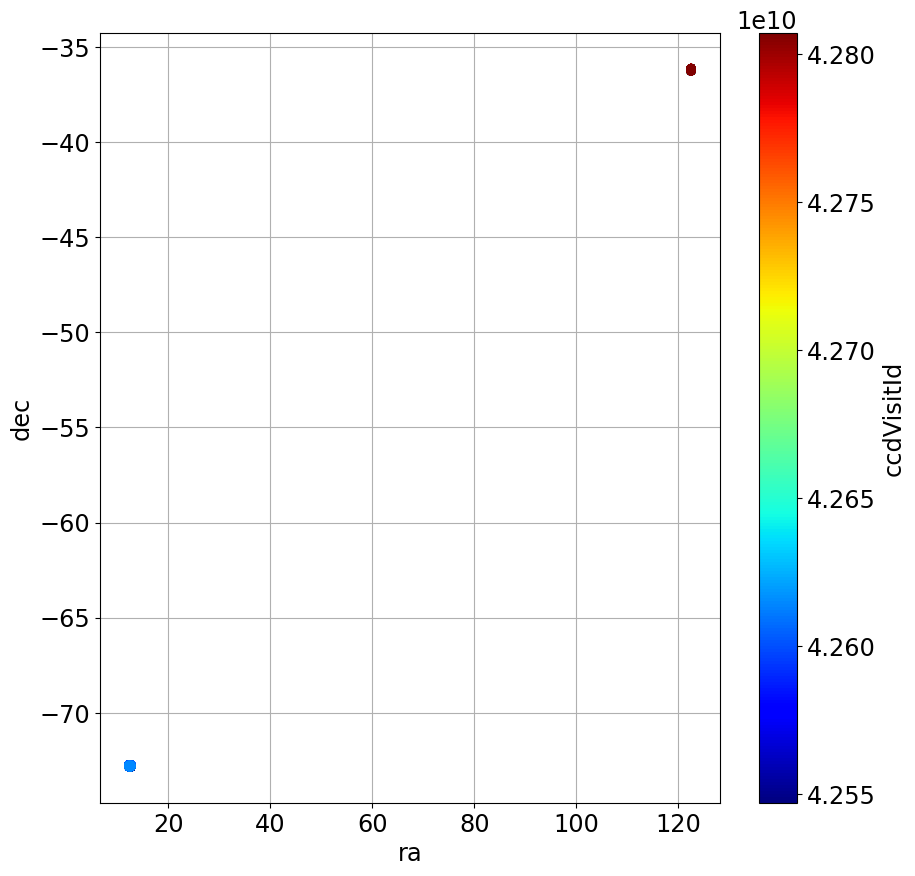

In [14]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
df_sel.plot.scatter('ra','dec',c='ccdVisitId',ax=ax,colormap='jet',grid=True)
ax.set_aspect("auto")

In [15]:
df_sel = df_sel[df_sel["dec"]>-40]

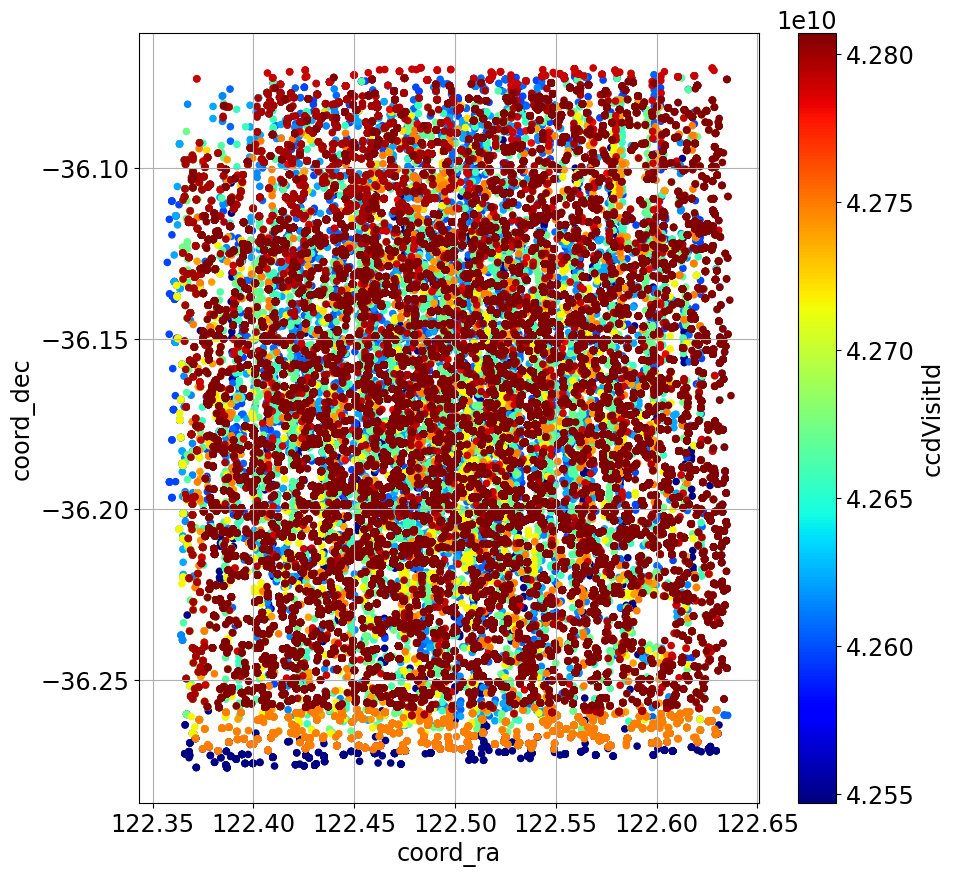

In [16]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
df_sel.plot.scatter('coord_ra','coord_dec',c='ccdVisitId',colormap='jet',grid=True,ax=ax)
ax.set_aspect("auto")

## Mag distributions

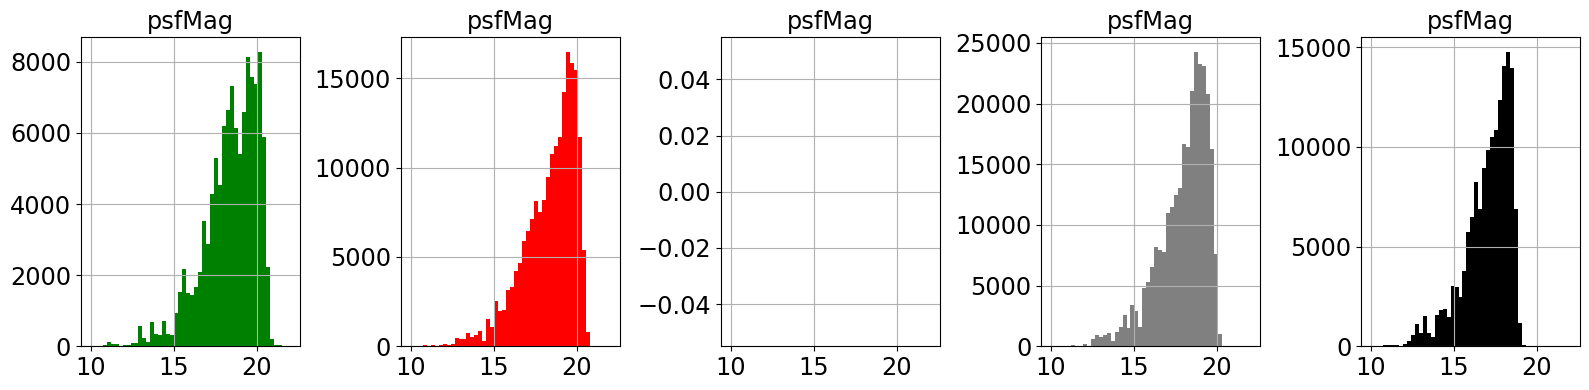

In [17]:
all_bands = ["g","r","i","z","y"]
NB = len(all_bands)
band_color = ["g","r","orange","grey","k"]
all_df_perband = [ df_sel[df_sel['band'] == band] for band in all_bands ]
fig,axs = plt.subplots(1,NB,figsize=(16,4))
for iband in range(NB):
    all_df_perband[iband].hist("psfMag",bins=50,range=(10,22),ax=axs[iband],facecolor=band_color[iband],label=all_bands[iband])
plt.tight_layout()


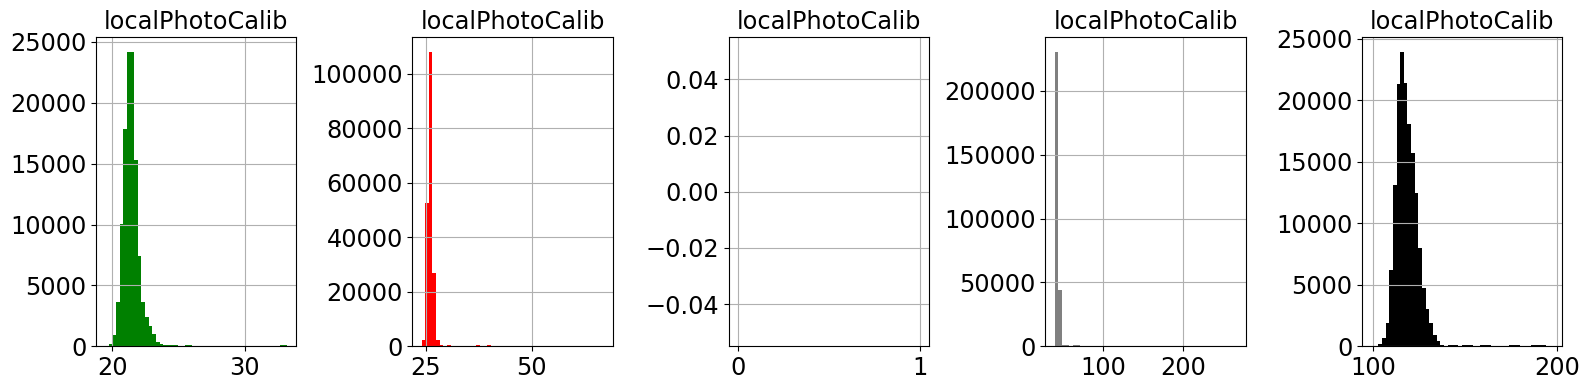

In [18]:
all_bands = ["g","r","i","z","y"]
NB = len(all_bands)
band_color = ["g","r","orange","grey","k"]
all_df_perband = [ df_sel[df_sel['band'] == band] for band in all_bands ]
fig,axs = plt.subplots(1,NB,figsize=(16,4))
for iband in range(NB):
    all_df_perband[iband].hist("localPhotoCalib",bins=50,ax=axs[iband],facecolor=band_color[iband],label=all_bands[iband])
plt.tight_layout()


## Merge sourceTable_visit with visitTable 

- dataframe join : column ``visit``  in df_sel much match the index in df_visit

In [19]:
df_m = df_sel.join(df_visit,on="visit",lsuffix='_s', rsuffix='_v')

In [20]:
df_m

,parentSourceId,ccdVisitId,x,y,ra,dec,coord_ra,coord_dec,calibFlux,psfFlux,...,physical_filter,band_v,zeroPoint,expMidptMJD,obsStart,obsStartMJD,Time,airmass,patchID,tractID
sourceId,,,,,,,,,,,,,,,,,,,,,
178455678547918850,0,42547149312,843.008901,45.159796,122.435030,-36.272363,122.435030,-36.272363,1.695050e+05,1.403268e+05,...,SDSSg_65mm~empty,g,28.03733,60270.293207,2023-11-22 07:01:58.064996,60270.293033,2023-11-22 07:01:58.064996,1.087878,3864.0,237.0
178455678547918852,0,42547149312,1138.910067,59.324358,122.444780,-36.271889,122.444780,-36.271889,4.190942e+05,4.081389e+05,...,SDSSg_65mm~empty,g,28.03733,60270.293207,2023-11-22 07:01:58.064996,60270.293033,2023-11-22 07:01:58.064996,1.087878,3864.0,237.0
178455678547918855,0,42547149312,1607.084070,69.337168,122.460212,-36.271468,122.460212,-36.271468,2.586276e+05,2.056118e+05,...,SDSSg_65mm~empty,g,28.03733,60270.293207,2023-11-22 07:01:58.064996,60270.293033,2023-11-22 07:01:58.064996,1.087878,3864.0,237.0
178455678547918857,0,42547149312,3416.830316,146.160919,122.519845,-36.268805,122.519845,-36.268805,4.367884e+07,4.248405e+07,...,SDSSg_65mm~empty,g,28.03733,60270.293207,2023-11-22 07:01:58.064996,60270.293033,2023-11-22 07:01:58.064996,1.087878,3864.0,237.0
178455678547918858,0,42547149312,567.601420,133.792847,122.425913,-36.270097,122.425913,-36.270097,1.186925e+05,1.065571e+05,...,SDSSg_65mm~empty,g,28.03733,60270.293207,2023-11-22 07:01:58.064996,60270.293033,2023-11-22 07:01:58.064996,1.087878,3864.0,237.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179546425221186016,179546425221185822,42807203584,2872.692959,3247.161036,122.462190,-36.091974,122.462190,-36.091974,6.505657e+05,6.838651e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179546425221186017,179546425221185822,42807203584,2849.169896,3193.001794,122.461440,-36.093423,122.461440,-36.093423,5.137150e+04,6.896195e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179546425221186018,179546425221185828,42807203584,2790.715975,3345.653349,122.459451,-36.089385,122.459451,-36.089385,6.883580e+05,7.249429e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_m.dropna(axis=0,how='any',inplace=True)

In [22]:
df_m

,parentSourceId,ccdVisitId,x,y,ra,dec,coord_ra,coord_dec,calibFlux,psfFlux,...,physical_filter,band_v,zeroPoint,expMidptMJD,obsStart,obsStartMJD,Time,airmass,patchID,tractID
sourceId,,,,,,,,,,,,,,,,,,,,,
178455678547918850,0,42547149312,843.008901,45.159796,122.435030,-36.272363,122.435030,-36.272363,1.695050e+05,1.403268e+05,...,SDSSg_65mm~empty,g,28.03733,60270.293207,2023-11-22 07:01:58.064996,60270.293033,2023-11-22 07:01:58.064996,1.087878,3864.0,237.0
178455678547918852,0,42547149312,1138.910067,59.324358,122.444780,-36.271889,122.444780,-36.271889,4.190942e+05,4.081389e+05,...,SDSSg_65mm~empty,g,28.03733,60270.293207,2023-11-22 07:01:58.064996,60270.293033,2023-11-22 07:01:58.064996,1.087878,3864.0,237.0
178455678547918855,0,42547149312,1607.084070,69.337168,122.460212,-36.271468,122.460212,-36.271468,2.586276e+05,2.056118e+05,...,SDSSg_65mm~empty,g,28.03733,60270.293207,2023-11-22 07:01:58.064996,60270.293033,2023-11-22 07:01:58.064996,1.087878,3864.0,237.0
178455678547918857,0,42547149312,3416.830316,146.160919,122.519845,-36.268805,122.519845,-36.268805,4.367884e+07,4.248405e+07,...,SDSSg_65mm~empty,g,28.03733,60270.293207,2023-11-22 07:01:58.064996,60270.293033,2023-11-22 07:01:58.064996,1.087878,3864.0,237.0
178455678547918858,0,42547149312,567.601420,133.792847,122.425913,-36.270097,122.425913,-36.270097,1.186925e+05,1.065571e+05,...,SDSSg_65mm~empty,g,28.03733,60270.293207,2023-11-22 07:01:58.064996,60270.293033,2023-11-22 07:01:58.064996,1.087878,3864.0,237.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179546424147444452,179546424147444226,42807203328,1155.786759,3840.222994,122.534157,-36.116345,122.534157,-36.116345,2.216581e+05,1.720426e+05,...,empty~SDSSy_65mm,y,26.26488,60301.277146,2023-12-23 06:38:50.384000,60301.276972,2023-12-23 06:38:50.384000,1.006013,3864.0,236.0
179546424147444453,179546424147444230,42807203328,882.901645,3802.425555,122.525194,-36.117442,122.525194,-36.117442,4.543471e+05,2.420943e+05,...,empty~SDSSy_65mm,y,26.26488,60301.277146,2023-12-23 06:38:50.384000,60301.276972,2023-12-23 06:38:50.384000,1.006013,3864.0,236.0
179546424147444454,179546424147444230,42807203328,885.792802,3839.777818,122.525273,-36.116448,122.525273,-36.116448,1.082125e+07,1.096884e+07,...,empty~SDSSy_65mm,y,26.26488,60301.277146,2023-12-23 06:38:50.384000,60301.276972,2023-12-23 06:38:50.384000,1.006013,3864.0,236.0


In [23]:
df_m["localPhotoCalibMag"] =  df_m['localPhotoCalib'].map(convert_fluxtomag)

In [24]:
df_m.columns

Index(['parentSourceId', 'ccdVisitId', 'x', 'y', 'ra', 'dec', 'coord_ra',
       'coord_dec', 'calibFlux', 'psfFlux', 'gaussianFlux', 'localPhotoCalib',
       'visit', 'band_s', 'extendedness_flag', 'detect_isPrimary', 'psfMag',
       'gaussianMag', 'nightObs', 'physical_filter', 'band_v', 'zeroPoint',
       'expMidptMJD', 'obsStart', 'obsStartMJD', 'Time', 'airmass', 'patchID',
       'tractID', 'localPhotoCalibMag'],
      dtype='object')

In [25]:
df_m[['visit','band_s','band_v','localPhotoCalibMag','zeroPoint']]
df_m['diffCalibMag'] = df_m["localPhotoCalibMag"] -  df_m["zeroPoint"]

In [26]:
all_bands = ["g","r","i","z","y"]
NB = len(all_bands)
band_color = ["g","r","orange","grey","k"]
all_df_perband = [ df_m[df_m['band_s'] == band] for band in all_bands ]


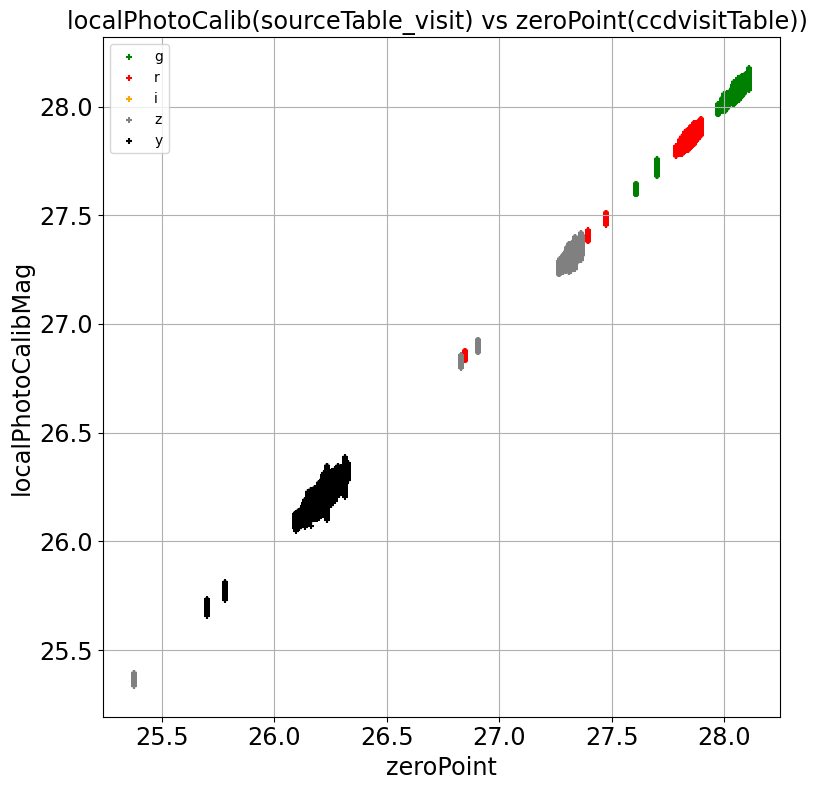

In [27]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
for iband in range(NB):
    all_df_perband[iband].plot.scatter(x="zeroPoint",y="localPhotoCalibMag",marker="+",ax=ax,color=band_color[iband],label=all_bands[iband])
ax.grid()
ax.set_aspect('auto')
title ="localPhotoCalib(sourceTable_visit) vs zeroPoint(ccdvisitTable)) "
ax.set_title(title)
plt.tight_layout()

/tmp/ipykernel_69545/3479857158.py:4: RuntimeWarning: Mean of empty slice.
  mean = data.mean()
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divi

Text(0.5, 1.0, 'localPhotoCalib(sourceTable_visit) - zeroPoint(ccdvisitTable)) ')

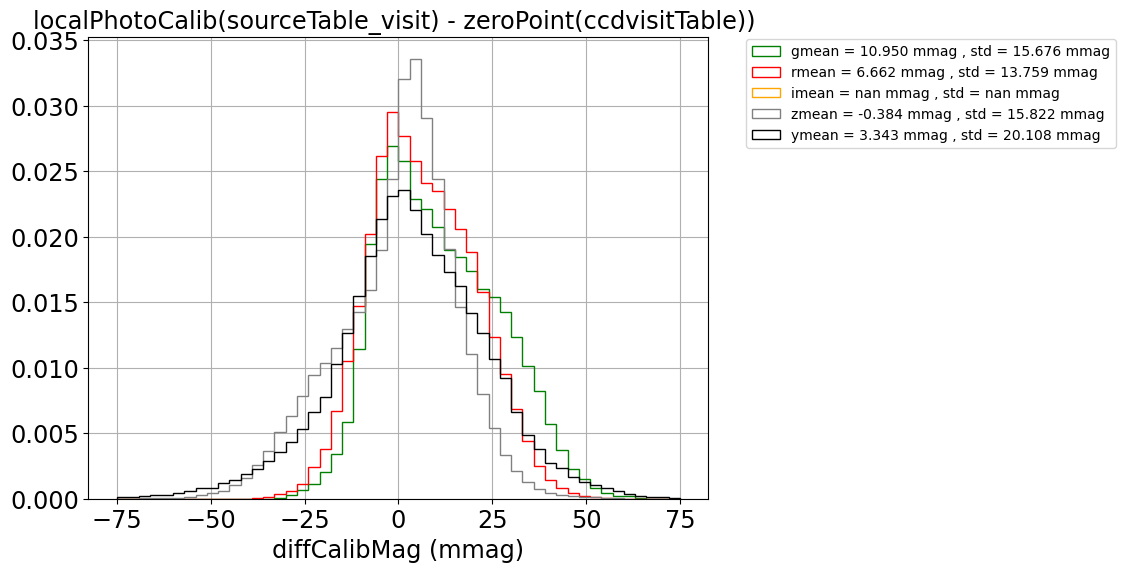

In [49]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
for iband in range(NB):
    data =  all_df_perband[iband]["diffCalibMag"].values*1000
    mean = data.mean()
    std = data.std()
    label = all_bands[iband] + f"mean = {mean:.3f} mmag , std = {std:.3f} mmag"
    ax.hist(data,bins=50,range=(-75,75),density=True,histtype="step",color=band_color[iband],label=label)
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.grid()
ax.set_xlabel("diffCalibMag (mmag)")
title ="localPhotoCalib(sourceTable_visit) - zeroPoint(ccdvisitTable)) "
ax.set_title(title)

In [ ]:
#fig,ax = plt.subplots(1,1,figsize=(16,10))
#for iband in range(NB):
#    all_df_perband[iband].plot.hist("diffCalibMag",bins=50, range=(-0.1,0.1),ax=ax,color=band_color[iband],label=all_bands[iband],histtype='step')
    #all_df_perband[iband].plot.scatter(x="nightObs",y="diffCalibMag",marker=".",ax=axs[iband],color=band_color[iband],label=all_bands[iband],grid=True)
   
#title ="diffCalibMag = localPhotoCalibMag(sourceTable_visit) - zeroPoint(ccdvisitTable))"
#ax.set_title(title)
#plt.tight_layout()

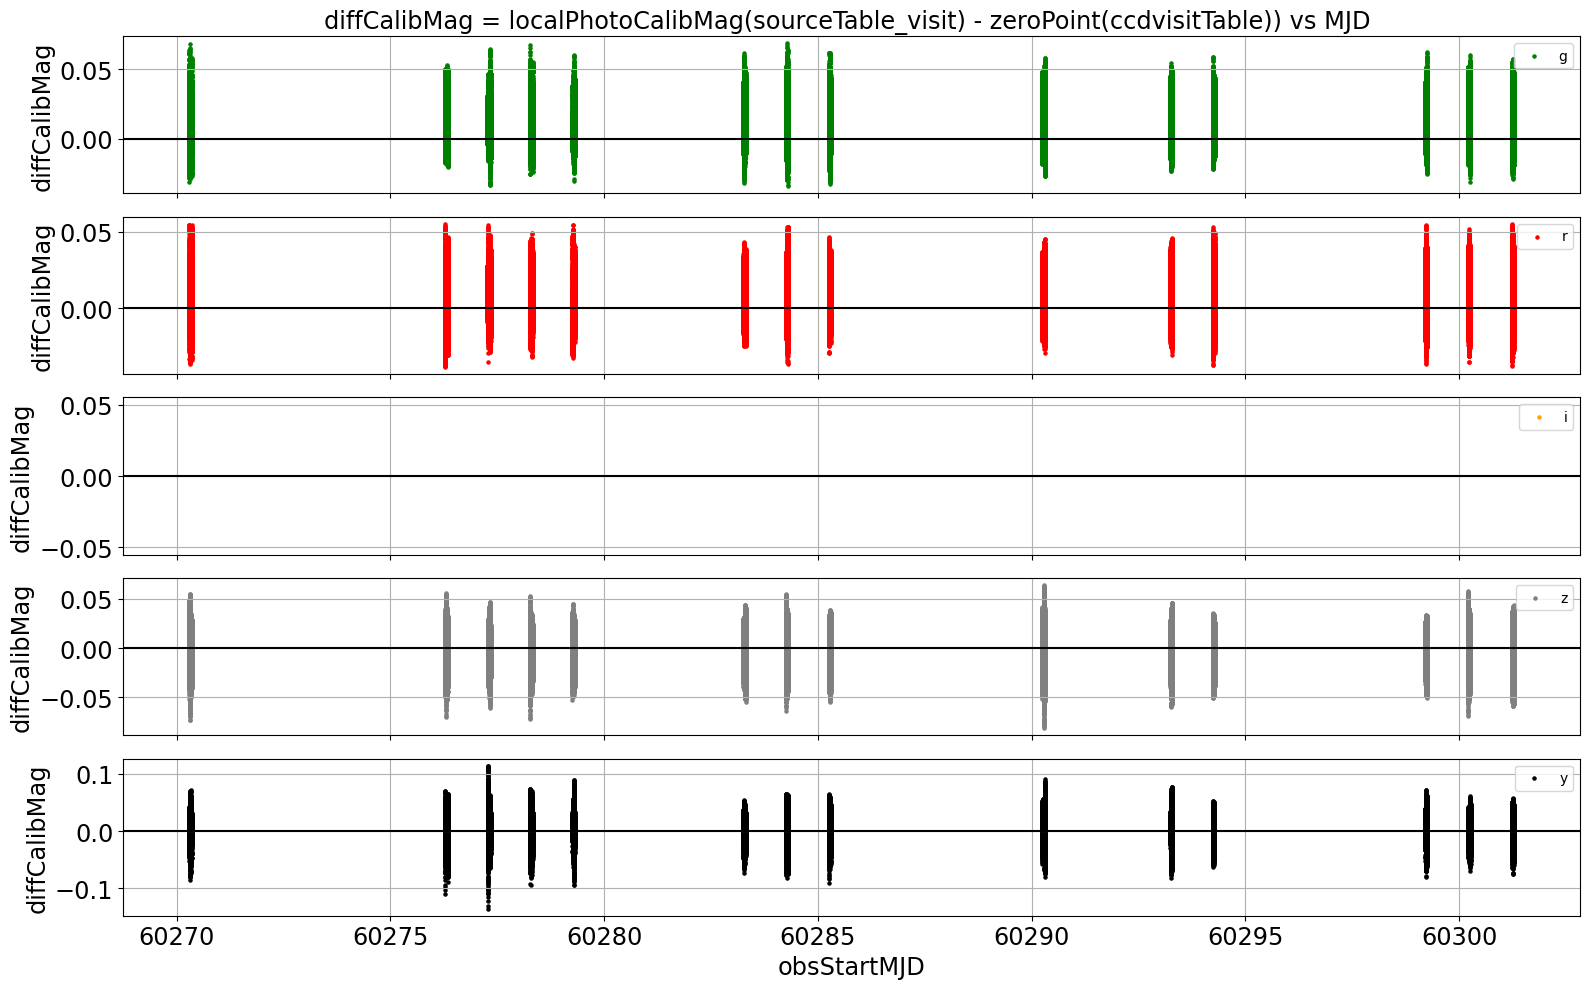

In [50]:
fig,axs = plt.subplots(5,1,figsize=(16,10),sharex=True)
for iband in range(NB):
    all_df_perband[iband].plot.scatter(x="obsStartMJD",y="diffCalibMag",marker=".",ax=axs[iband],color=band_color[iband],label=all_bands[iband],grid=True)
    #all_df_perband[iband].plot.scatter(x="nightObs",y="diffCalibMag",marker=".",ax=axs[iband],color=band_color[iband],label=all_bands[iband],grid=True)
    axs[iband].axhline(0,color="k")
    
title ="diffCalibMag = localPhotoCalibMag(sourceTable_visit) - zeroPoint(ccdvisitTable)) vs MJD "
axs[0].set_title(title)
plt.tight_layout()

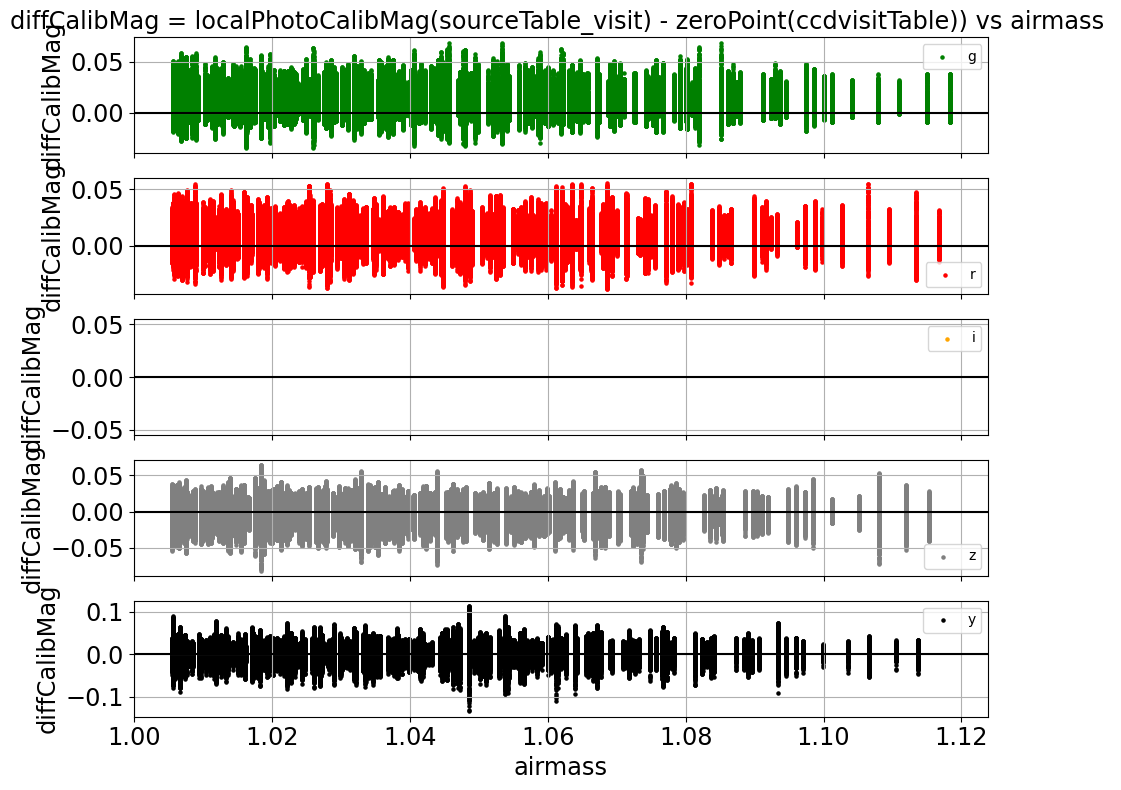

In [51]:
fig,axs = plt.subplots(5,1,figsize=(10,8),sharex=True)
for iband in range(NB):
    all_df_perband[iband].plot.scatter(x="airmass",y="diffCalibMag",marker=".",ax=axs[iband],color=band_color[iband],label=all_bands[iband],grid=True)
    #all_df_perband[iband].plot.scatter(x="nightObs",y="diffCalibMag",marker=".",ax=axs[iband],color=band_color[iband],label=all_bands[iband],grid=True)
    axs[iband].axhline(0,color="k")
    
title ="diffCalibMag = localPhotoCalibMag(sourceTable_visit) - zeroPoint(ccdvisitTable)) vs airmass "
axs[0].set_title(title)
plt.tight_layout()